# Principal Component Analysis comparison of distinct testing periods
Principal component analysis aims to extract the most significant dimensions of variance in a dataset. A usecase for such analysis is to reduce the dimension of a dataset in order to make readable plots in 2D or 3D. Here, PCA is performed on a set of training points. The PCA transformation is then applied to two separate phases of testing data, each in which fouling is presumed to increase over time. This is performed for two different datasets.

Unfortunately, when pricipal components are extracted from the dataset, physical meanings such as units are lost. Therefore, it can be difficult to interpret and derive meaning from the resulting plots. A possible explaination of the results can be seen below.

In [1]:
# %load example_pca_plot.py
import src.core as mlApi
import src.core_configs as configs

Using TensorFlow backend.


# Dataset D

In [2]:
# 1. Define dataset specifics 

filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfigD('180min')
datasetName = "D Simulated"

# Part 1 of the testing period
testtime1 = [
    "2020-04-01 00:00:00",
    "2020-05-05 00:00:00"
]

# Part 2 of the testing period
testtime2 = [
    "2020-05-06 00:00:00",
    "2020-08-01 00:00:00",
]

print("Finding PCA plot for dataset "+datasetName)
print(" ")

Finding PCA plot for dataset D Simulated
 


In [3]:
# 2. Initiate and divide data
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
mlApi._df = df[columnOrder[:6]]
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure 

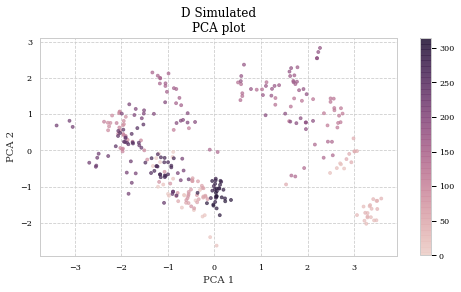

In [4]:
# 3. Plot scatter plot of training data with color scaling
mlApi.pcaPlot(df_train, plotTitle=datasetName)

## Training data scatter plot, dataset D
As before, training points are plotted in order to give context to the below figures. Do note that as the number of training points in the simulated dataset is rather low and the set values (e.g. flow) are regulated quite drastically, it is expected to see some distinct groupings and jumps in both the training and test set

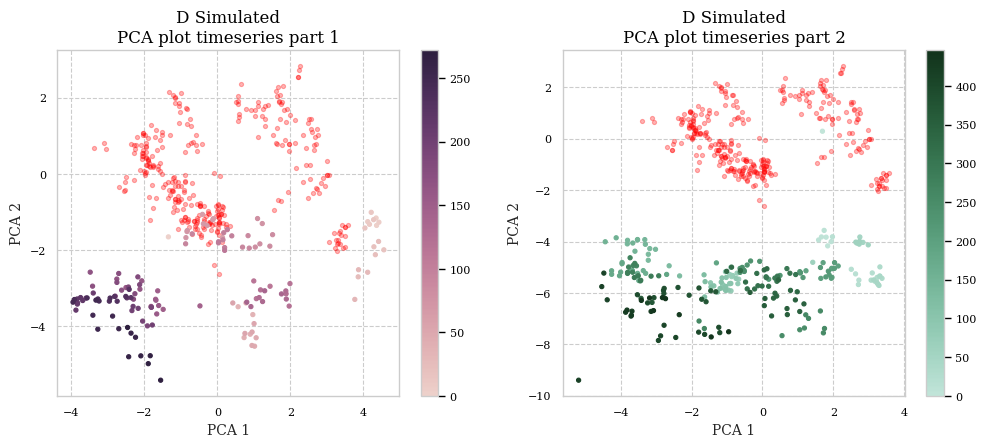

In [5]:
# 4. Plot scatter plot of testing data
mlApi.pcaDuoPlot(df_train, df_test_1, df_test_2, plotTitle=datasetName)

## Testing data scatter plot,  dataset 2
Here we obtain additional support to our claim that PCA plots can be difficult to interpret. Using the same columns as for dataset 1, we here see a completely different development as fouling is added. Here, it appears increased levels of fouling move the data points to the left and (to a lesser degree) downwards. Even so, there is a pretty clear trend, again suggesting this may be useful to some degree, although not as a direct fouling indicator

In [6]:
# Reset to prepare for second dataset
# -------------------------------------
mlApi.reset()
# -------------------------------------

# Dataset F

In [7]:
# 1. 

filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfigF('180min')
datasetName = "F"

testtime = [
    ["2018-01-01 00:00:00", "2019-05-01 00:00:00"]
]

testtime1 = [
    "2018-09-25 00:00:00",
    "2018-12-10 00:00:00"
]

testtime2 = [
    "2019-02-15 00:00:00",
    "2019-05-01 00:00:00",
]

print("Finding PCA plot for dataset "+datasetName)
print(" ")

Finding PCA plot for dataset F
 


In [8]:
# 2. 
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
mlApi._df = df[columnOrder[:6]]
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)

Columns before removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0102_MA_Y - Varm side A temperatur inn
Col. 2 : TIC0101_CA_YX - Varm side A temperatur ut
Col. 3 : TT0104_MA_Y - Varm side B temperatur inn
Col. 4 : TIC0103_CA_YX - Varm side B temperatur ut
Col. 5 : TT0106_MA_Y - Varm side C temperatur inn
Col. 6 : TIC0105_CA_YX - Varm side C temperatur ut
Col. 7 : PDT0108_MA_Y - Varm side A trykkfall
Col. 8 : PDT0119_MA_Y - Varm side B trykkfall
Col. 9 : PDT0118_MA_Y - Varm side C trykkfall
Col. 10 : PIC0104_CA_YX - Innløpsseparator trykk
Col. 11 : TIC0425_CA_YX - Kald side temperatur inn
Col. 12 : TT0651_MA_Y - Kald side A temperatur ut
Col. 13 : TT0652_MA_Y - Kald side B temperatur ut
Col. 14 : TT0653_MA_Y - Kald side C temperatur ut
Col. 15 : TIC0101_CA_Y - Kald side A ventilåpning
Col. 16 : TIC0103_CA_Y - Kald side B ventilåpning
Col. 17 : TIC0105_CA_Y - Kald side C ventilåpning

Columns after removal: 
Col. 0 : FYN0111 - Gasseksport rate
Col. 1 : TT0106_MA_Y - Varm side C te

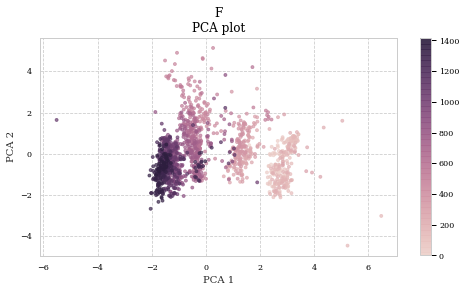

In [9]:
# 3. 
mlApi.pcaPlot(df_train, plotTitle=datasetName)

## Training data scatter plot, dataset F
Above, the training points are plotted with the color darkness gradually increasing for the duration of the training set. This is done in order to provide reference for the below graphs, in which all training points are plotted in red in order to reduce confusion

Ignoring some outliers, it appears the dataset is gradually moving towards the right as the timeseries progressed. Knowing that the flow rate of the processing field is increasing throughout this time, it appears somewhat logical that some of this variation can be explained by increased production volumes. Apart from this, there is little meaning to made only by looking at the training points.

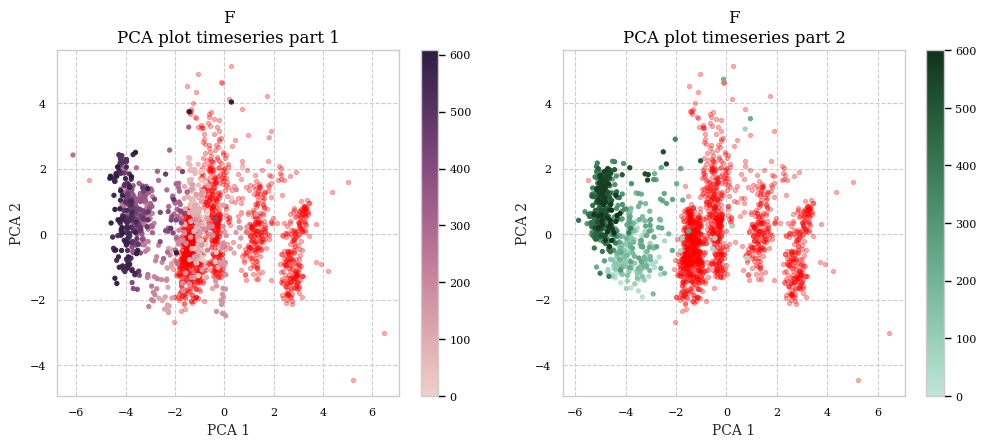

In [10]:
# 4. 
mlApi.pcaDuoPlot(df_train, df_test_1, df_test_2, datasetName)

## Test data scatter plot, dataset F
In the above plots, the color darkness of the points gradually increase. For part 1, this color ranges from light pink at the beginning to dark purple at the end. For part 2, the color is light green at the beginning and dark green at the end. Training points are the same, plotted in red, for both plots. For reference, use the previously mentioned plot of the training set distribution.

As mentioned initially, it appears difficult to say anything specifically about the development of heat exchanger fouling by looking at the PCA plots. Even so, some interesting trends can be seen. The first timeseries gradually trends towards the right and upwards. Following the switch to a clean heat exchanger, the initial points of the second time series have moved significantly compared to the end points of the first time series. The point of operation then moves slightly upwards and to the right over a period of time.

This trend could be interpreted as gradual fouling in the heat exchanger, although this is onyl suggested and by no means validated by these findings.

In [11]:
# Reset to prepare for second dataset
# -------------------------------------
mlApi.reset()
# -------------------------------------

# Dataset G

In [12]:
# 1. 

filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfigG('180min')
datasetName = "G"

testtime = [
	"2017-01-01 00:00:00",
	"2020-03-01 00:00:00",
]


testtime1 = [
    "2019-02-01 00:00:00",
    "2019-04-01 00:00:00",
]

testtime2 = [
    "2019-09-01 00:00:00",
    "2019-11-10 00:00:00",
]

print("Finding PCA plot for dataset "+datasetName)
print(" ")

Finding PCA plot for dataset G
 


In [13]:
# 2. 
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
mlApi._df = df[columnOrder[:6]]
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
df_test_1, df_test_2 = mlApi.getTestTrainSplit([testtime1], testtime2)

Columns before removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Columns after removal: 
Col. 0 : PDI0064 - Process side dP
Col. 1 : TI0066 - Process side Temperature out
Col. 2 : TZI0012 - Process side Temperature in
Col. 3 : FI0010 - Process side flow rate
Col. 4 : TT0025 - Cooling side Temperature in
Col. 5 : TT0026 - Cooling side Temperature out
Col. 6 : PI0001 - Cooling side Pressure in
Col. 7 : FI0027 - Cooling side flow rate
Col. 8 : TIC0022U - Cooling side valve opening
Col. 9 : PDT0024 - Cooling side dP

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 801 rows

Finding da

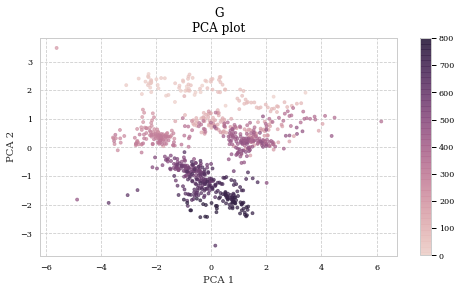

In [14]:
# 3. 
mlApi.pcaPlot(df_train, plotTitle=datasetName)

## Training data scatter plot, dataset G


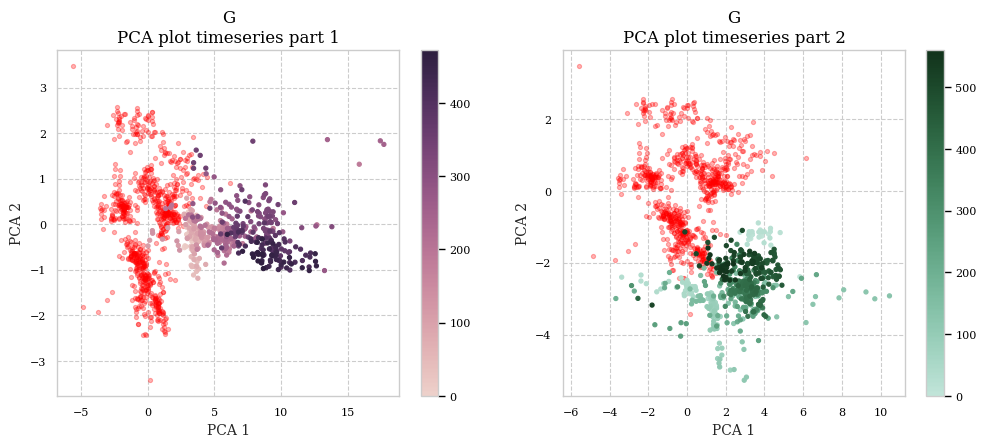

In [15]:
# 4. 
mlApi.pcaDuoPlot(df_train, df_test_1, df_test_2, datasetName)

## Testing data scatter plot, dataset G
